# **Nhập môn Trí tuệ Nhân tạo**

  * Bài thực hành tuần 4
  * Sinh viên: Huỳnh Thị Bảo Trân
  * MSSV: 19110482

**Đề bài:**      
a) Giả sử không gian trạng thái chứa tất cả các vị trí (x, y) nằm trong mặt phẳng. Có bao nhiêu trạng thái ở đây? Có bao nhiêu đường đi từ đỉnh xuất phát tới đỉnh đích?      

b) Giải thích ngắn gọn vì sao đường đi ngắn nhất từ một đỉnh của đa giác tới một đỉnh khác trong mặt phẳng nhất định phải bao gồm các đoạn thẳng nối một số đỉnh của các đa giác? Hãy định nghĩa lại không gian trạng thái. Không gian trạng thái này sẽ lớn bao nhiêu?      

c) Định nghĩa các hàm cần thiết để thực thi bài toán tìm kiếm, bao gồm hàm successor nhận một đỉnh làm đầu vào và trả về tập đỉnh có thể đi đến được từ đỉnh đó trong vòng 1 bước.      

d) Áp dụng một thuật toán tìm kiếm để giải bài toán.        

**Trả lời:**      
a) Theo hình vẽ, ta có thể thấy rằng có 8 đa giác với 33 đỉnh (x, y) và 2 đỉnh đầu S và đỉnh cuối G. Có rất nhiều đường đi từ S đến G được em hiển thị ở hình bên dưới. Đường màu xanh dương là đường đi ngắn nhất có chi phí thấp.

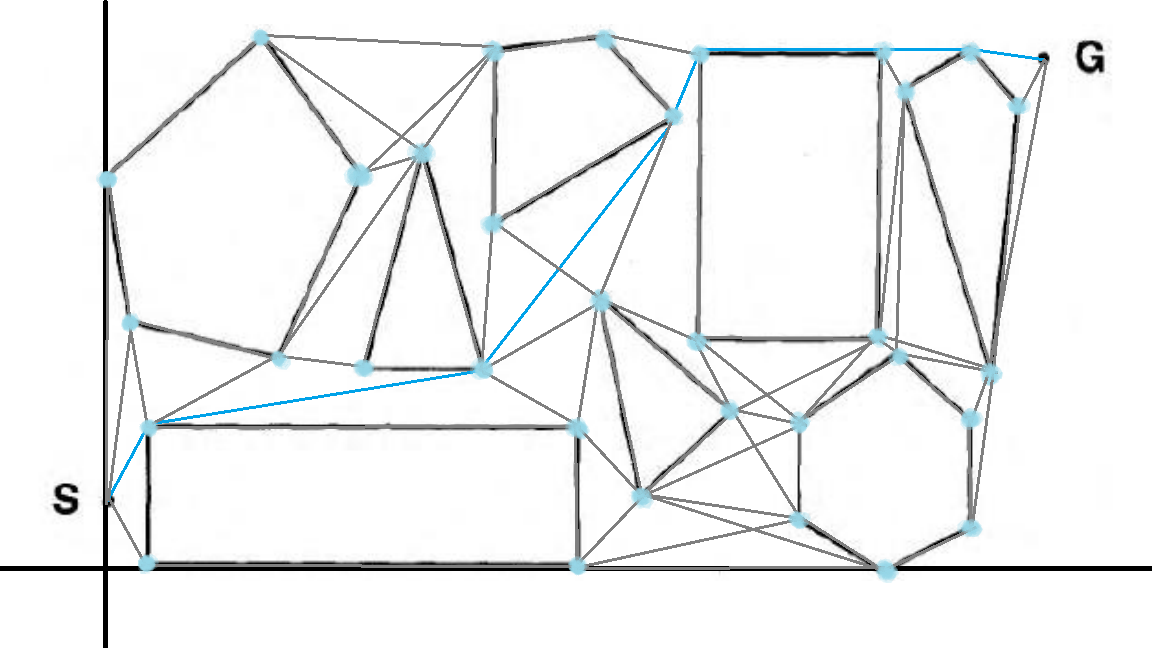

In [1]:
from IPython.display import display, Image
display(Image(filename='dothi.png'))

b) Đường đi ngắn nhất từ một đỉnh của đa giác tới một đỉnh khác trong mặt phẳng nhất định phải bao gồm các đoạn thẳng nối một số đỉnh của các đa giác bởi vì xuất phát từ đỉnh này của đa giác đến đỉnh kia đỉnh kia của đa giác, thì cạnh là đoạn thẳng ngắn nhất. Đồng thời, khi vẽ trên hệ trục toạ độ, sẽ xấp xỉ các đoạn thẳng. 

Định nghĩa không gian trạng thái:      
• begin: đỉnh đầu.      
• goal: đỉnh cuối.       
• object_poly: danh sách các đa giác và các đỉnh của đa giác đó (Có 8 hình và 33 đỉnh).      
• node_all: danh sách tất cả các đỉnh và 2 đỉnh đầu và đỉnh cuối (33 đỉnh đa giác và 2 đỉnh đầu, cuối).      

c) Định nghĩa các hàm:

**Các thư viện được sử dụng (nếu có)**

In [11]:
from queue import Queue, PriorityQueue
import math 
from os.path import isfile, join

d) Thuật toán tìm kiếm

In [2]:
import copy

def greedy_search(self, win):
    positions = [(1, -1), (-1, 0), (-1, -1), (0, -1), (-1, 1), (1, 0), (0, 1), (1, 1)]
    start_point = self.robot.get_start_point()
    end_point = self.robot.get_end_point()
    passing_points = []
    if self.amount_stop > 1:
        tmp_stops = [start_point]
        tmp_stops.extend(self.stops[:])
        tmp_stops.append(end_point)
        self.find_permutation(self.amount_stop, tmp_stops)

    passing_points.extend(self.stops[:])
    passing_points.append(end_point)
    best_cost = -1
    x_tmp = start_point[0]
    y_tmp = start_point[1]
    area_copy = copy.deepcopy(self.area)
    while passing_points:
        queue_points = []
        queue_points.append(start_point)
        end_point = passing_points.pop(0)
        closed_points = copy.deepcopy(area_copy)
        while queue_points:
            curr_point = queue_points.pop(0)
            self.area[curr_point[0]][curr_point[1]] = "+"
            if curr_point[0] - x_tmp == 0 or curr_point[1] - y_tmp == 0:
                best_cost += 1

            else:
                best_cost += 1.50

            x_tmp = curr_point[0]
            y_tmp = curr_point[1]
            if x_tmp == end_point[0] and y_tmp == end_point[1]:
                break

            tmp_queue = []
            curr_weight = self.width * self.leng
            for position in positions:
                if 0 < x_tmp + position[0] < self.width and 0 < y_tmp + position[1] < self.leng:
                    if self.area[x_tmp + position[0]][y_tmp + position[1]] == 0:
                        h_weight = round(
                            self.eucliean_distance(x_tmp + position[0], y_tmp + position[1], end_point[0],
                                                    end_point[1]), 2)
                        if position[0] == 0 or position[1] == 0:
                            h_weight += 1

                        else:
                            if self.area[x_tmp][y_tmp + position[1]] != 0 and self.area[x_tmp + position[0]][
                                y_tmp] != 0:
                                continue

                            h_weight += 1.50

                        if h_weight <= curr_weight:
                            curr_weight = h_weight
                            if closed_points[x_tmp + position[0]][y_tmp + position[1]] == 0:
                                closed_points[x_tmp + position[0]][y_tmp + position[1]] = 1
                                tmp_queue.insert(0, (x_tmp + position[0], y_tmp + position[1]))
                        else:
                            if closed_points[x_tmp + position[0]][y_tmp + position[1]] == 0:
                                closed_points[x_tmp + position[0]][y_tmp + position[1]] = 1
                                tmp_queue.append((x_tmp + position[0], y_tmp + position[1]))

            for i in range(len(tmp_queue) - 1, -1, -1):
                queue_points.insert(0, tmp_queue[i])

        if self.area[end_point[0]][end_point[1]] == 0:
            return -1

        start_point = (end_point[0], end_point[1])

    return best_cost